Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...

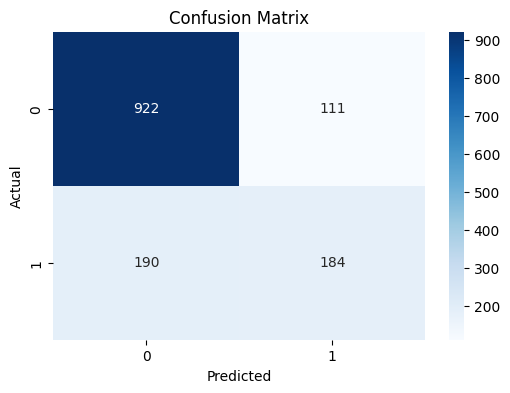

In [1]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Step 2: Upload the Excel file (Google Colab only)
# If running in Colab, uncomment the below lines:
# from google.colab import files
# uploaded = files.upload()

# 📌 Step 3: Load the Excel file
from google.colab import files
uploaded = files.upload()
import pandas as pd

# Read the uploaded CSV file into a Pandas DataFrame
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Show the first 5 rows
print(data.head())


# 📌 Step 4: Explore Data
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing values per column:")
print(data.isnull().sum())

# 📌 Step 5: Clean Data
# Convert 'TotalCharges' to numeric and drop missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)

# Encode categorical variables
label_enc = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_enc.fit_transform(data[col])

# 📌 Step 6: Split Features (X) and Target (y)
X = data.drop("Churn", axis=1)
y = data["Churn"]

# 📌 Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 8: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 📌 Step 9: Build the Model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# 📌 Step 10: Predictions
y_pred = model.predict(X_test)

# 📌 Step 11: Evaluation
print("\n✅ Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 📌 Step 12: Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
